In [2]:
%matplotlib inline
import matplotlib.style as style

In [3]:
import matplotlib.pyplot as plt
import numpy as np

import scqubits as scq
import qutip as qt

style.use('default')
plt.rcParams['figure.figsize'] = [6, 4]
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scq.settings.PROGRESSBAR_DISABLED = True

In [5]:
hbar = 1
h = hbar*2*np.pi
qe = 1

# Unit conversions
MHz = 10.0**(-3)
GHz = 1.0
kHz = 10.0**(-6)
mus = 10.0**3
ns = 1.0

## Basic fluxonium

In [7]:
consts = dict(
    EC = 0.46 * GHz,
    EJ = 8.11 * GHz,
    EL = 0.24 * GHz,
)

flux = 0.5

fluxonium = scq.Fluxonium(
    **consts,
    flux = flux,
    cutoff = 110,
    truncated_dim = 10
)

[0.00000000e+00 4.06599764e-01 5.02117889e+03 5.03653764e+03
 9.14279959e+03]
15.765353498675694


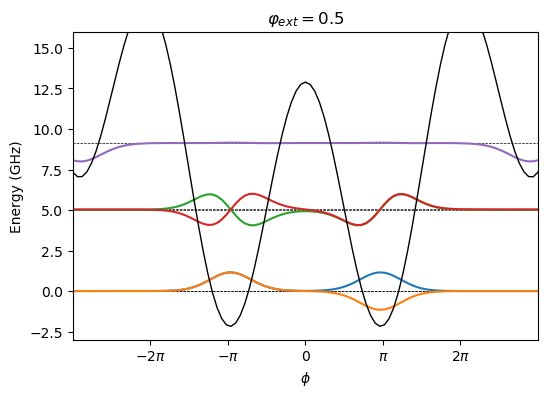

In [10]:
evals_count=5

evals, evecs = fluxonium.eigensys(evals_count=evals_count)
evec = fluxonium.wavefunction((evals,evecs))
vev = evals[0]
evals = evals - vev
print(evals/MHz)
print((evals[3] - (evals[2]-evals[1]))/MHz)
phi_grid = fluxonium._default_grid.make_linspace()

plt.plot(phi_grid, [evals]*len(phi_grid), 'k--', linewidth=0.5)
for i in range(evals_count):
    evec = fluxonium.wavefunction(which=i, esys=(evals, evecs))
    plt.plot(phi_grid, [evals[i] + 2*np.real(evec.amplitudes[phi_indx]) for phi_indx in range(len(phi_grid))])
plt.plot(phi_grid, fluxonium.potential(phi_grid) - vev, 'k', linewidth=1)

plt.xlim(-3*np.pi, 3*np.pi)
plt.xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
ax = plt.gca()
ax.set_xticklabels([r"$-2{\pi}$", r"$-{\pi}$", 0, r"${\pi}$", r"$2{\pi}$"])
plt.ylim(-3, 16)
plt.xlabel(r"$\phi$")
plt.ylabel(r"Energy (GHz)")
plt.title(f"$\\varphi_{{ext}}={flux}$")
plt.show()

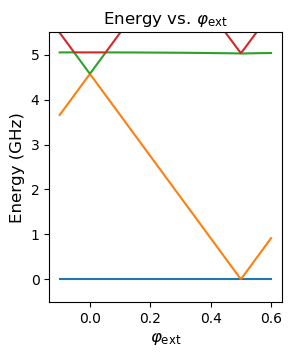

In [66]:
phiext_grid  = np.linspace(-0.1, 0.6, 201, endpoint=True)
evals_spectrum_phiext = fluxonium.get_spectrum_vs_paramvals('flux', phiext_grid,
                                                          evals_count=evals_count,
                                                          subtract_ground=True)
evals_vs_phiext = evals_spectrum_phiext.energy_table
plt.plot(phiext_grid, evals_vs_phiext)
plt.xlabel(r'$\varphi_{\mathrm{ext}}$', fontsize=12)
plt.ylim(-0.5, 5.5)
plt.ylabel('Energy (GHz)', fontsize=12)
plt.title(r'Energy vs. $\varphi_\mathrm{ext}$')
plt.show()

## Basic transmon

In [58]:
transmon_consts = dict(
    EC = 0.25 * GHz,
    EJ = 10.0 * GHz,
)

ng = 0

transmon = scq.Transmon(
    **transmon_consts,
    ng=ng,
    ncut = 110,
    truncated_dim = 10
)

[    0.          4205.58170359  8116.9182389  11701.84191183
 14726.99205624]


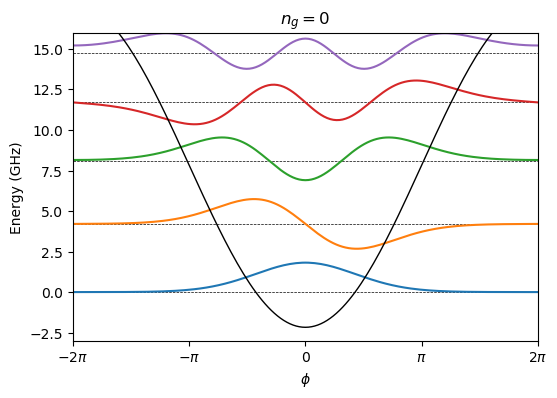

In [61]:
evals_count=5

evals, evecs = transmon.eigensys(evals_count=evals_count)
evec = transmon.wavefunction((evals,evecs))
vev = evals[0]
evals = evals - vev
print(evals/MHz)
theta_grid = transmon._default_grid.make_linspace()

plt.plot(theta_grid, [evals]*len(theta_grid), 'k--', linewidth=0.5)
for i in range(evals_count):
    evec = transmon.wavefunction(which=i, esys=(evals, evecs))
    plt.plot(theta_grid, [evals[i] + 2*np.real(evec.amplitudes[phi_indx]) for phi_indx in range(len(theta_grid))])
plt.plot(theta_grid, transmon.potential(theta_grid) - vev, 'k', linewidth=1)

plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
ax = plt.gca()
ax.set_xticklabels([r"$-2{\pi}$", r"$-{\pi}$", 0, r"${\pi}$", r"$2{\pi}$"])
plt.ylim(-3, 16)
plt.xlabel(r"$\phi$")
plt.ylabel(r"Energy (GHz)")
plt.title(f"$n_g={ng}$")
plt.show()

## 2 transmon swap

In [6]:
transmon1_consts = dict(
    EC = 0.25 * GHz,
    EJ = 11.0 * GHz,
)

ng = 0

transmon1 = scq.Transmon(
    **transmon1_consts,
    ng=ng,
    ncut = 110,
    truncated_dim = 10
)

transmon2_consts = dict(
    EC = 0.25 * GHz,
    EJ = 10.0 * GHz,
)

ng = 0

transmon2 = scq.Transmon(
    **transmon2_consts,
    ng=ng,
    ncut = 110,
    truncated_dim = 10
)

evals_count=3
cutoff = evals_count

evals1, evecs1 = transmon1.eigensys(evals_count=evals_count)
# evecs2= transmon1.wavefunction((evals1,evecs1))
# transmon1_gs = transmon1.matrixelement_table('n_operator',
#                                              evals_count=evals_count)
vev = evals1[0]
evals1 = evals1 - vev

evals2, evecs2 = transmon2.eigensys(evals_count=evals_count)
# transmon2_gs = transmon2.matrixelement_table('n_operator',
#                                              evals_count=evals_count)
# evecs2 = transmon2.wavefunction((evals2,evecs2))
vev = evals2[0]
evals2 = evals2 - vev

g = 0.1

In [7]:
alpha1 = evals1[2]-evals1[1]-evals1[1]
alpha2 = evals2[2]-evals2[1]-evals2[1]

In [8]:
b1 = qt.tensor(qt.destroy(cutoff), qt.qeye(cutoff))
b2 = qt.tensor(qt.qeye(cutoff), qt.destroy(cutoff))

Adjust qubit frequency so 2 qubit gate is on resonance

8.63034669272609
8.63034669272609
0.0


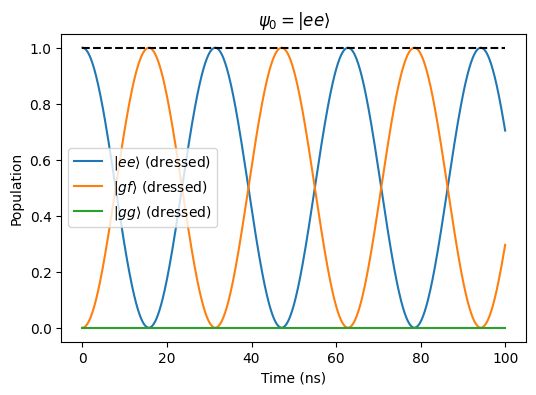

In [14]:
H = 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))

evals2_adjust = evals2.copy()
evals2_adjust[2] = evals2[1] + evals1[1] # ADJUST QUBIT FREQUENCY TO BE EXACTLY ON RESONANCE
for n in range(cutoff):
    for m in range(cutoff):
        ket = qt.tensor(qt.basis(cutoff, n), qt.basis(cutoff, m))
        H += evals1[n] * ket * ket.dag()
        H += evals2_adjust[m] * ket * ket.dag()

# matrix elements
# H += qt.tensor(qt.Qobj(transmon1_gs), qt.qeye(cutoff)) + \
#     qt.tensor(qt.qeye(cutoff), qt.Qobj(transmon2_gs))
    
# swap from |11> <-> |02>
# print(evals1, evals2)
ee = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 1))
gf = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 2))
gg = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 0))

print(qt.expect(H, ee))
print(qt.expect(H, gf))
print(qt.expect(H, gg))
H += g * (ee * gf.dag() + gf * ee.dag())

times = np.linspace(0, 100, 1000)
result = qt.sesolve(H, ee, times).states
plt.plot(times, [np.abs(ee.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|ee\rangle$ (dressed)')
plt.plot(times, [np.abs(gf.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|gf\rangle$ (dressed)')
plt.plot(times, [np.abs(gg.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|gg\rangle$ (dressed)')
plt.plot(times, [1]*len(times), 'k--')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.title(r'$\psi_0=|ee\rangle$')
plt.show()

Apply drive on resonance

8.63034669272609
8.116918238895392
0.0


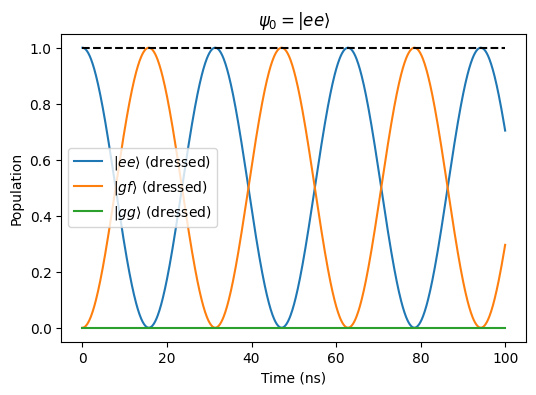

In [12]:
H = 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))
for n in range(cutoff):
    for m in range(cutoff):
        ket = qt.tensor(qt.basis(cutoff, n), qt.basis(cutoff, m))
        H += evals1[n] * ket * ket.dag()
        H += evals2[m] * ket * ket.dag()
        
# matrix elements
# H += qt.tensor(qt.Qobj(transmon1_gs), qt.qeye(cutoff)) + \
#     qt.tensor(qt.qeye(cutoff), qt.Qobj(transmon2_gs))
    
# swap from |11> <-> |02>
ee = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 1))
gf = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 2))
gg = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 0))

print(qt.expect(H, ee))
print(qt.expect(H, gf))
print(qt.expect(H, gg))

# drive at wd = w_|02> - w_|11>
wd = qt.expect(H, gf) - qt.expect(H, ee)
H_drive = g * ee * gf.dag()
def H_drive_func(t, args):
    return np.exp(1j*wd*t)
H_solver = [H, [H_drive, H_drive_func], [H_drive.dag(), lambda t, args: H_drive_func(-t, args)]]

times = np.linspace(0, 100, 1000)

result = qt.mesolve(H_solver, ee, times).states
plt.plot(times, [np.abs(ee.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|ee\rangle$ (dressed)')
plt.plot(times, [np.abs(gf.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|gf\rangle$ (dressed)')
plt.plot(times, [np.abs(gg.overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|gg\rangle$ (dressed)')
plt.plot(times, [1]*len(times), 'k--')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.title(r'$\psi_0=|ee\rangle$')
plt.show()

Parametric control tunable transmon qubit-cavity drive (TLS approx)

In [6]:
# Map bare states of each transmon to dressed states in combined system
def find_level(H, ket_orig_basis):
    evals, evecs = H.eigenstates()
    best_overlap = 0
    best_state = -1
    for n, evec in enumerate(evecs):
        overlap = np.abs(ket_orig_basis.overlap(evec))
        if overlap > best_overlap:
            best_overlap = overlap
            best_state = n
    return best_state, evecs[best_state]

drive (a dag + a) fg <-> ge

$\sigma_z = aa^\dagger - a^\dagger a$

wd 2.8371396094723824


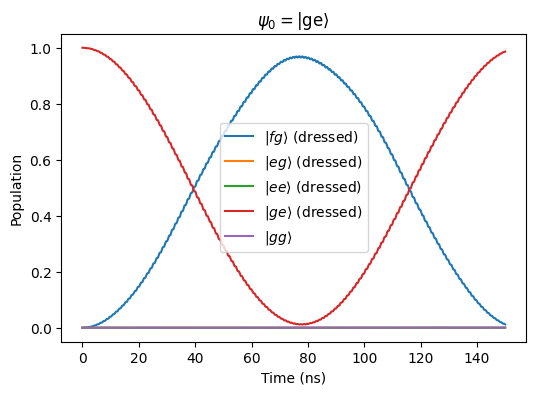

In [7]:
cutoff = 10
g = 1.0

a = qt.tensor(qt.qeye(cutoff), qt.destroy(cutoff)) # transmon1 op
b = qt.tensor(qt.destroy(cutoff), qt.qeye(cutoff)) # transmon2 op
H_transmon1 = evals1[1]*a.dag()*a + 1/2*alpha1*a.dag()*a*(a.dag()*a - 1)
H_transmon2 = evals2[1]*b.dag()*b + 1/2*alpha2*b.dag()*b*(b.dag()*b - 1) # can't have 2 transmons be exactly the same, or else no way to distinguish ge and eg
H_int = g * (qt.tensor(qt.create(cutoff) + qt.destroy(cutoff), qt.create(cutoff) + qt.destroy(cutoff)))

H = H_transmon1 + H_transmon2 + H_int

levels = dict(
    gg = find_level(H, qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 0)))[1],
    ee = find_level(H, qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 1)))[1],
    eg = find_level(H, qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 0)))[1],
    ge = find_level(H, qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 1)))[1],
    fg = find_level(H, qt.tensor(qt.basis(cutoff, 2), qt.basis(cutoff, 0)))[1],
)

# drive at wd = w1 - w2
wd = (qt.expect(H, levels['fg']) - qt.expect(H, levels['ge']))
print('wd', wd)

# transmon frequency modulation amplitude
eps = 0.1 # GHz

# modulate transmon1 g-e frequency
# H_drive = 1/2*eps*a.dag()*a # modulate transmon1 frequency, even transition -> need even number of photons
H_drive = 1/2*eps*(a.dag()+a) # drive with charge, odd transition -> need odd number photons
def H_drive_func(t, args):
    return np.sin(wd * t)

H_solver = [H, [H_drive, H_drive_func]]

times = np.linspace(0, 150, 1000)

psi0_name = 'ge'
result = qt.mesolve(H_solver, levels[psi0_name], times).states
plt.plot(times, [np.abs(levels['fg'].overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|fg\rangle$ (dressed)')
plt.plot(times, [np.abs(levels['eg'].overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|eg\rangle$ (dressed)')
plt.plot(times, [np.abs(levels['ee'].overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|ee\rangle$ (dressed)')
plt.plot(times, [np.abs(levels['ge'].overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|ge\rangle$ (dressed)')
plt.plot(times, [np.abs(levels['gg'].overlap(result[t]))**2 for t in range(len(times))],
         label=r'$|gg\rangle$')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Population')
plt.title(r'$\psi_0=|$'+psi0_name+r'$\rangle$')
plt.show()

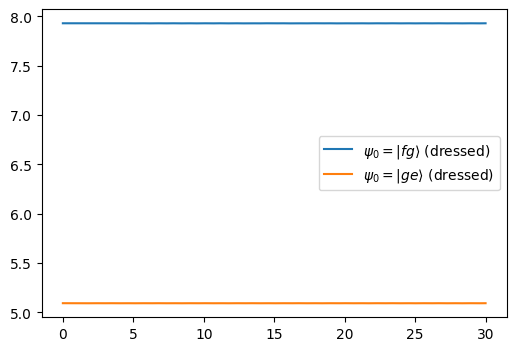

In [8]:
times = np.linspace(0, 30, 200)
fg_evals = []
ge_evals = []

for t in times:
    H_t = H+H_drive*H_drive_func(t, dict())
    evals_t = H_t.eigenenergies()
    n, ge = find_level(H_t, qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 1)))
    ge_evals.append(evals_t[n])
    n, fg = find_level(H_t, qt.tensor(qt.basis(cutoff, 2), qt.basis(cutoff, 0)))
    fg_evals.append(evals_t[n])
plt.plot(times, fg_evals, label=r'$\psi_0=|fg\rangle$ (dressed)')
plt.plot(times, ge_evals, label=r'$\psi_0=|ge\rangle$ (dressed)')
plt.legend()
plt.show()

Parametric control tunable transmon qubit-cavity drive

In [74]:
f_res = 5.0 # GHz # resonator frequency
c = qt.tensor(qt.qeye(cutoff), qt.destroy(cutoff)) # cavity op
b = qt.tensor(qt.destroy(cutoff), qt.qeye(cutoff)) # transmon op
H_res = f_res * qt.tensor(qt.qeye(cutoff), qt.create(cutoff)*qt.destroy(cutoff))

evals1, evecs1 = transmon1.eigensys(evals_count=evals_count)
evals1 = evals1 - evals1[0]
# print(evals1)

evals2 = H_res.eigenenergies()
evals2 = evals2 - evals2[0]

b = qt.tensor(qt.destroy(cutoff), qt.qeye(cutoff)) # transmon op

H = H_res + 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))
for n in range(cutoff):
    for m in range(cutoff):
        ket = qt.tensor(qt.basis(cutoff, n), qt.basis(cutoff, m))
#         H += evals1[n] * ket * ket.dag() # COMMENT OUT
        H += evals2[m] * ket * ket.dag()
# print(H)
    
# swap from |f0> <-> |e1>: |f0><e1| + |e1><f0|
f0 = qt.tensor(qt.basis(cutoff, 2), qt.basis(cutoff, 0))
e0 = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 0))
e1 = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 1))
g1 = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 1))
g0 = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 0))
# H += g * (f0 * e1.dag() + e1 * f0.dag())
H += g * (e0 * g1.dag() + g1 * e0.dag())

# print(H)

# print(H.eigenenergies())

# print(qt.expect(H, f0))
# print(qt.expect(H, e0))
# print(qt.expect(H, e1))
# print(qt.expect(H, g0))

# drive at wd = w_|f0> - w_|e1>
# wd = qt.expect(H, f0) - qt.expect(H, e1)
wd = qt.expect(H, e0) - qt.expect(H, g1)

# transmon frequency modulation amplitude
eps = 20.0
ep_EJ = 0.3

# modulate transmon g-e frequency

# THIS SHOULD WORK
# H_drive = 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))
# for m in range(cutoff):
#     ket = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, m)) # |em><em|
#     H_drive += eps * ket * ket.dag()
#     ket = qt.tensor(qt.basis(cutoff, 2), qt.basis(cutoff, m)) # |em><em|
#     H_drive += eps * ket * ket.dag()
# def H_drive_func(t, args):
#     return np.sin(wd * t)
# # print(H_drive)
# H_solver = [H, [H_drive, H_drive_func]]


# WHY DOES NOT WORK??
# i think it has to do with whether wd is matching with which levels
# that get adjusted in drive???? idk

def H_drive_n(n):
    H_drive = 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))
    for m in range(cutoff):
        ket = qt.tensor(qt.basis(cutoff, n), qt.basis(cutoff, m)) # |em><em|
        H_drive += ket * ket.dag()
    return H_drive

def H_drive_func(t, args):
    n = args['n']
    consts = transmon1_consts.copy()
    consts['EJ'] = 13.0 * (1 + ep_EJ * np.sin(wd * t))
    evals_count=3
    transmon = scq.Transmon(
        **consts,
        ng=ng,
        ncut = 110,
        truncated_dim = 10
    )
    evals_t, _ = transmon.eigensys(evals_count=evals_count)
#     evals_t -= evals_t[0]
#     print('evals', evals_t[1], evals_t[2])
    return evals_t[n] - evals_t[0]

H_solver = [H]
for n in range(cutoff):
    H_solver.append([H_drive_n(n), 
                     lambda t, args: H_drive_func(t, args=dict(n=n))])
# print(H_solver)


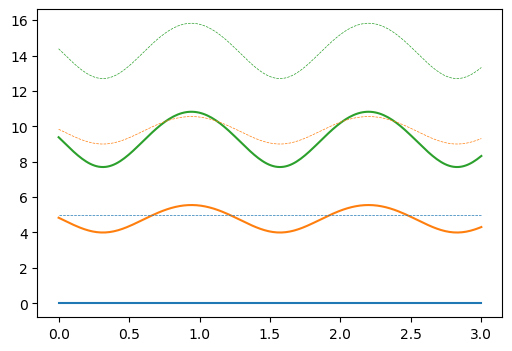

In [75]:
times = np.linspace(0, 3, 200)
plt.plot(times, np.array([[H_drive_func(t, dict(n=n)) for n in range(cutoff)] for t in times]))
for n in range(cutoff):
    plt.plot(times, evals2[3] + [H_drive_func(t, dict(n=n)) for t in times], '--', linewidth=0.5, color=default_colors[n])
plt.show()

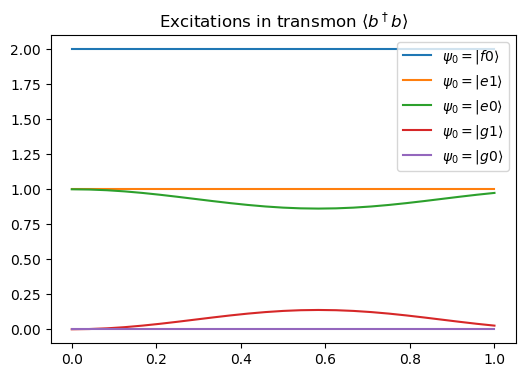

In [76]:
times = np.linspace(0, 1, 25)

count_op = b.dag()*b

plt.plot(times, qt.mesolve(H_solver, f0, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|f0\rangle$')
plt.plot(times, qt.mesolve(H_solver, e1, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|e1\rangle$')
plt.plot(times, qt.mesolve(H_solver, e0, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|e0\rangle$')
plt.plot(times, qt.mesolve(H_solver, g1, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|g1\rangle$')
plt.plot(times, qt.mesolve(H_solver, g0, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|g0\rangle$')
plt.legend()
plt.title(r'Excitations in transmon $\langle b^\dagger b \rangle$')
plt.show()

## Interacting fluxoniums

In [4]:
cutoff = 13 # number of harmonic oscillator states
truncated_dim = cutoff # number of dimensions? HilbertSpace uses the truncated dimension

fluxonium1_consts = dict(
    EC = 0.46 * GHz,
    EJ = 8.11 * GHz,
    EL = 0.24 * GHz,
)
flux1 = 0.5
fluxonium1 = scq.Fluxonium(
    **fluxonium1_consts,
    flux = flux1,
    cutoff = cutoff,
    truncated_dim = truncated_dim 
)


fluxonium2_consts = dict(
    EC = 0.46 * GHz,
    EJ = 8.11 * GHz,
    EL = 0.24 * GHz,
)
flux2 = 0.5
fluxonium2 = scq.Fluxonium(
    **fluxonium1_consts,
    flux = flux2,
    cutoff = cutoff,
    truncated_dim = truncated_dim
)


fluxonium3_consts = dict(
    EC = 0.46 * GHz,
    EJ = 8.11 * GHz,
    EL = 0.24 * GHz,
)
flux3 = 0.5
fluxonium3 = scq.Fluxonium(
    **fluxonium1_consts,
    flux = flux3,
    cutoff = cutoff,
    truncated_dim = truncated_dim
)


In [5]:
evals_count=10

evals1, evecs1 = fluxonium1.eigensys(evals_count=evals_count)
# evecs2= transmon1.wavefunction((evals1,evecs1))
vev = evals1[0]
evals1 = evals1 - vev
fluxonium1_gs = fluxonium1.matrixelement_table('n_operator',
                                             evals_count=evals_count)

evals2, evecs2 = fluxonium2.eigensys(evals_count=evals_count)
# evecs2 = transmon2.wavefunction((evals2,evecs2))
vev = evals2[0]
evals2 = evals2 - vev
fluxonium2_gs = fluxonium2.matrixelement_table('n_operator',
                                             evals_count=evals_count)

0.005682425768272381
3.8683771391828117
0.0


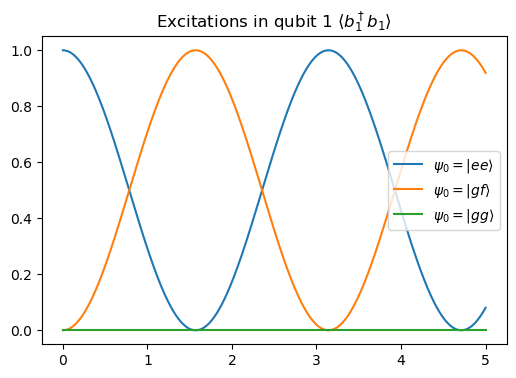

In [6]:
cutoff = evals_count
b1 = qt.tensor(qt.destroy(cutoff), qt.qeye(cutoff))
b2 = qt.tensor(qt.qeye(cutoff), qt.destroy(cutoff))

g = 1
    
H = 0*qt.tensor(qt.qeye(cutoff), qt.qeye(cutoff))
for n in range(cutoff):
    for m in range(cutoff):
        ket = qt.tensor(qt.basis(cutoff, n), qt.basis(cutoff, m))
        H += evals1[n] * ket * ket.dag()
        H += evals2[m] * ket * ket.dag()
        
# matrix elements
# H += qt.tensor(qt.Qobj(transmon1_gs), qt.qeye(cutoff)) + \
#     qt.tensor(qt.qeye(cutoff), qt.Qobj(transmon2_gs))
    
# swap from |11> <-> |02>
ee = qt.tensor(qt.basis(cutoff, 1), qt.basis(cutoff, 1))
gf = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 2))
gg = qt.tensor(qt.basis(cutoff, 0), qt.basis(cutoff, 0))

print(qt.expect(H, ee))
print(qt.expect(H, gf))
print(qt.expect(H, gg))

# drive at wd = w_|02> - w_|11>
wd = qt.expect(H, gf) - qt.expect(H, ee)
H_drive = g * ee * gf.dag()
def H_drive_func(t, args):
    return np.exp(1j*wd*t)
H_solver = [H, [H_drive, H_drive_func], [H_drive.dag(), lambda t, args: H_drive_func(-t, args)]]

times = np.linspace(0, 5, 1000)

count_op = b1.dag()*b1

plt.plot(times, qt.mesolve(H_solver, ee, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|ee\rangle$')
plt.plot(times, qt.mesolve(H_solver, gf, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|gf\rangle$')
plt.plot(times, qt.mesolve(H_solver, gg, times, e_ops=[count_op]).expect[0],
         label=r'$\psi_0=|gg\rangle$')
plt.legend()
plt.title(r'Excitations in qubit 1 $\langle b_1^\dagger b_1 \rangle$')
plt.show()